In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans
RSEED = 8 
# to filter out warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [6]:
data = pd.read_excel("/content/satisfaction.xlsx")
data.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [10]:
data.isnull().sum()

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [11]:
data.isna().sum()

id                                     0
satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [13]:
(data == "na").sum()

id                                   0
satisfaction_v2                      0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [14]:
data.shape

(129880, 24)

In [19]:
data.rename(columns={"satisfaction_v2": "satisfaction"},inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction                       129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [21]:
data['satisfaction'].value_counts()

satisfied                  71087
neutral or dissatisfied    58793
Name: satisfaction, dtype: int64

In [22]:
listColumn = ['satisfaction']

In [27]:
data.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.045465
std,37493.270818,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.416353
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,97410.250000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


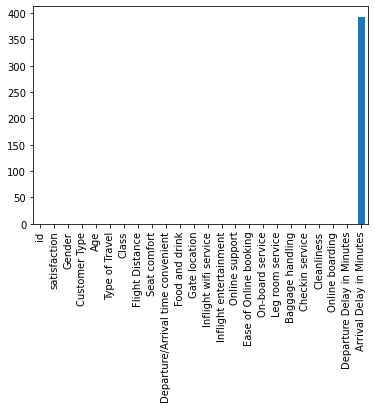

In [23]:
data.columns
series = (data.isnull()).sum(axis=0)
series.plot.bar(stacked = True)

#sns.histplot(data=series, x="flipper_length_mm")

In [24]:
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(axis = 0), inplace = True)
data.isnull().sum()

id                                   0
satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

The Arrival Delay with null values were replaced by the median of the values in the column

In [26]:
data.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.045465
std,37493.270818,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.416353
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,97410.250000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [28]:
print(data.groupby('satisfaction').size())

satisfaction
neutral or dissatisfied    58793
satisfied                  71087
dtype: int64


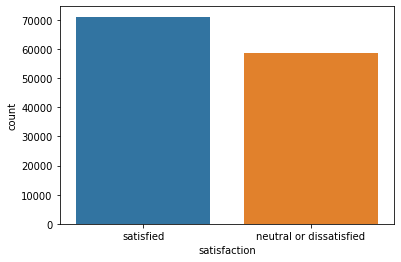

In [30]:
import seaborn as sns

sns.countplot(data['satisfaction'],label="Count")

([<matplotlib.patches.Wedge at 0x7fc8cb6ad3d0>,
 [Text(-0.16295287232566041, 1.0878632089563547, 'satisfied'),
  Text(0.16295287232566005, -1.0878632089563547, 'neutral or dissatisfied')],
 [Text(-0.08888338490490567, 0.5933799321580115, '54.7%\n(71087)'),
  Text(0.08888338490490547, -0.5933799321580115, '45.3%\n(58793)')])

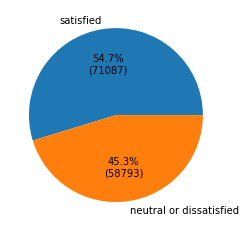

In [35]:
import matplotlib.pyplot as plt


def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format


s = data['satisfaction'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))

In [36]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [37]:
def encodeColumn(parameter):
    data[parameter] = encoder.fit_transform(data[parameter])

In [38]:
listColumn = ['satisfaction']

for i in listColumn:
    encodeColumn(i)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction                       129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [48]:
#data.drop(['id'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'satisfaction'], data['satisfaction'], stratify=data['satisfaction'], random_state=66)
     

In [52]:
data.Class.value_counts(normalize=True)



Business    0.478596
Eco         0.448945
Eco Plus    0.072459
Name: Class, dtype: float64

In [53]:
data_eco = data[data['Class']=='Eco']
data_eco1 = data[data['Class']=='Eco Plus']
data_bus = data[data['Class']=='Business']

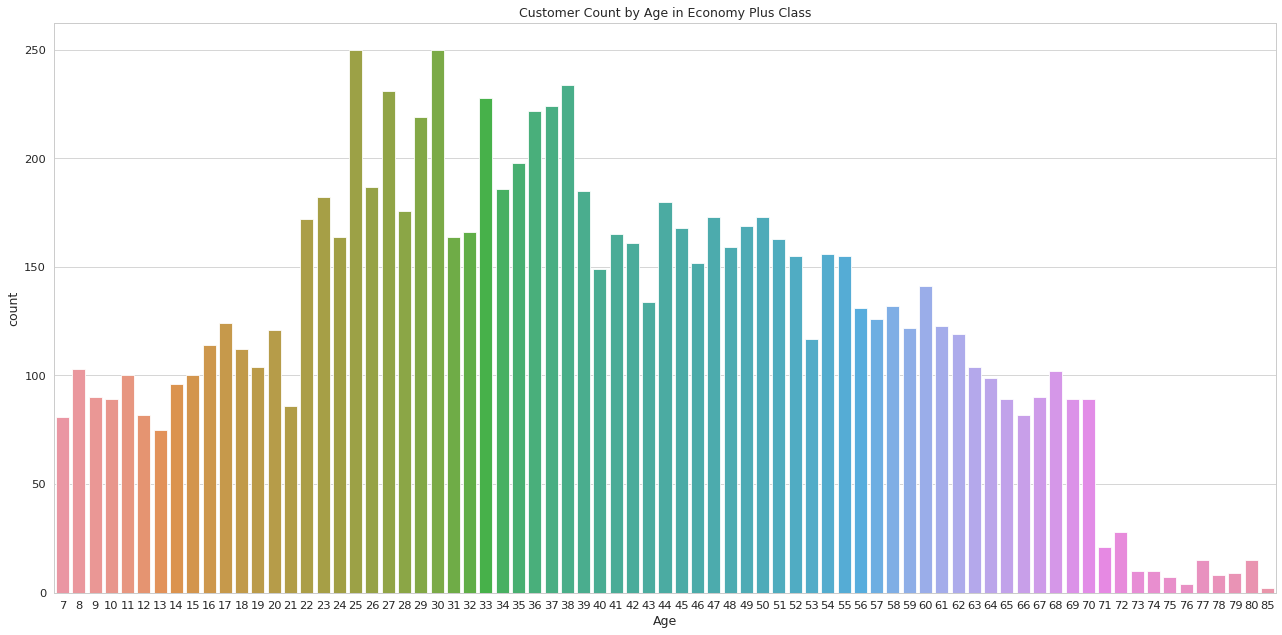

In [54]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(18,9))
sns.countplot(data=data_eco1,x='Age')
ax.set_title('Customer Count by Age in Economy Plus Class')
plt.tight_layout()
plt.show()

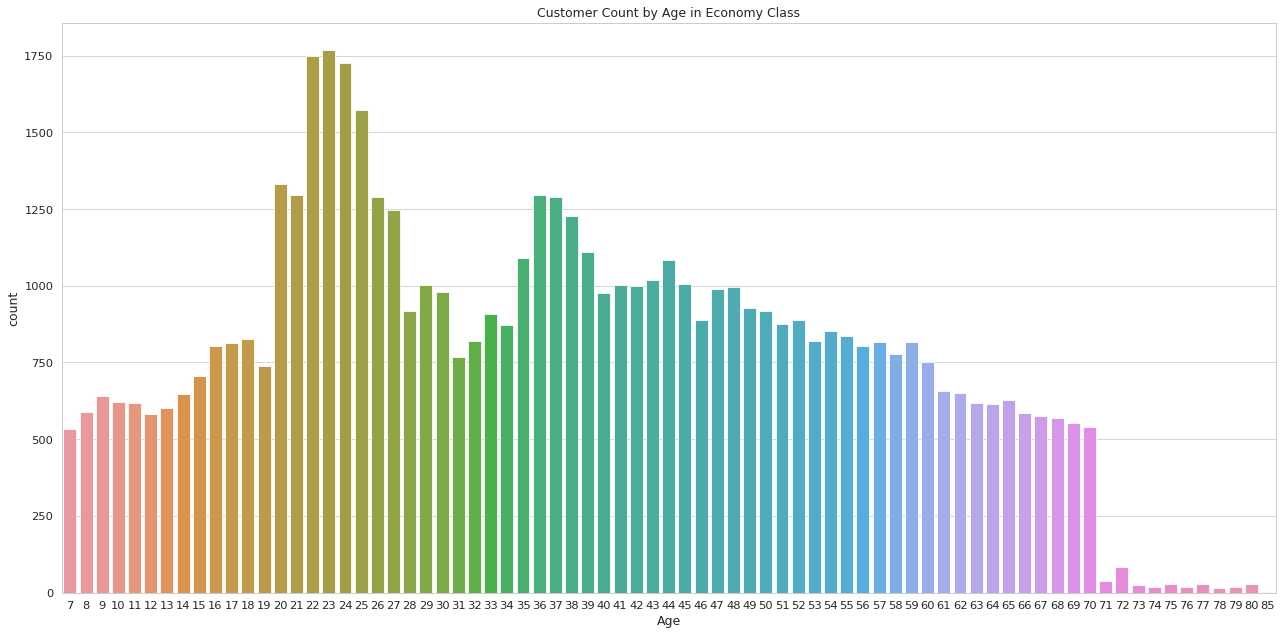

In [55]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(18,9))
sns.countplot(data=data_eco,x='Age')
ax.set_title('Customer Count by Age in Economy Class')
plt.tight_layout()
plt.show()

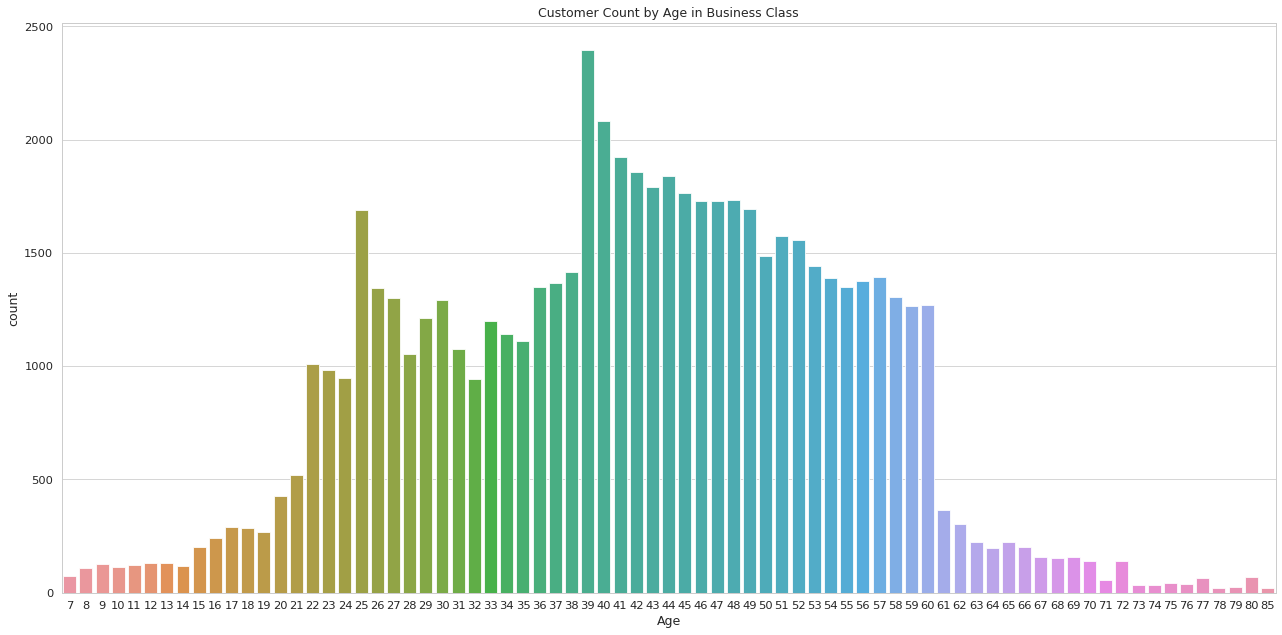

In [57]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(18,9))
sns.countplot(data=data_bus,x='Age')
ax.set_title('Customer Count by Age in Business Class')
plt.tight_layout()
plt.show()

In [59]:
data['Customer Type'].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

In [60]:
data['Class'].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

In [61]:
data['Type of Travel'].value_counts()

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64

In [62]:
data_loyal = data[data['Customer Type'] == 'Loyal Customer']

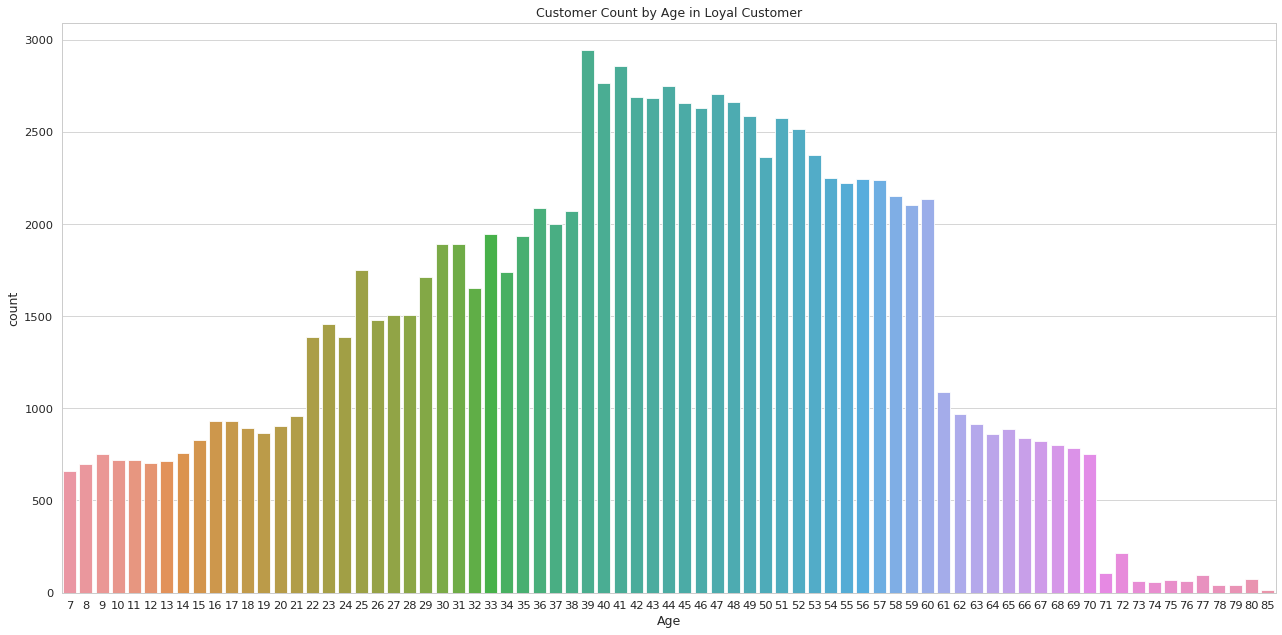

In [63]:
#Loyal Customer

sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(18,9))
sns.countplot(data=data_loyal,x='Age')
ax.set_title('Customer Count by Age in Loyal Customer')
plt.tight_layout()
plt.show()

In [66]:
data['Customer Type'].value_counts(normalize=True)

Loyal Customer       0.816908
disloyal Customer    0.183092
Name: Customer Type, dtype: float64

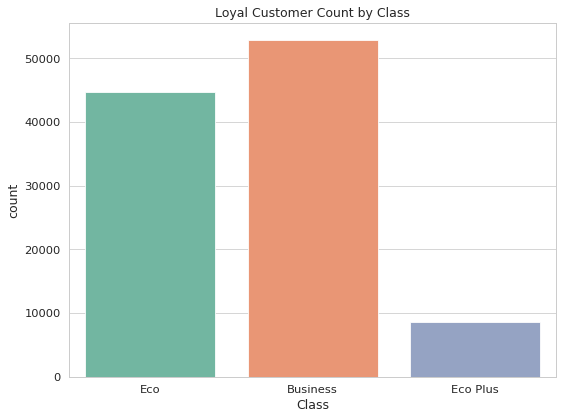

In [67]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.countplot(data=data_loyal,x='Class',palette='Set2')
ax.set_title('Loyal Customer Count by Class')
plt.tight_layout()
plt.show()

In [68]:
data['Type of Travel'].value_counts(normalize=True)

Business travel    0.690584
Personal Travel    0.309416
Name: Type of Travel, dtype: float64

In [69]:
data_typeB = data[data['Type of Travel'] == 'Business travel']
data_typeP = data[data['Type of Travel'] == 'Personal Travel']

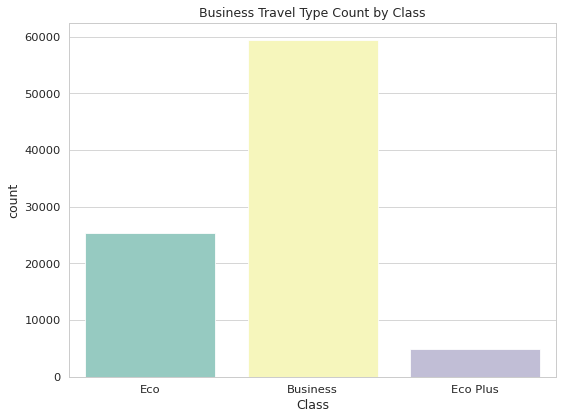

In [70]:
sns.set_style('whitegrid')
sns.set_context("paper", font_scale=1.3)
fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.countplot(data=data_typeB,x='Class',palette='Set3')
ax.set_title('Business Travel Type Count by Class')
plt.tight_layout()
plt.show()

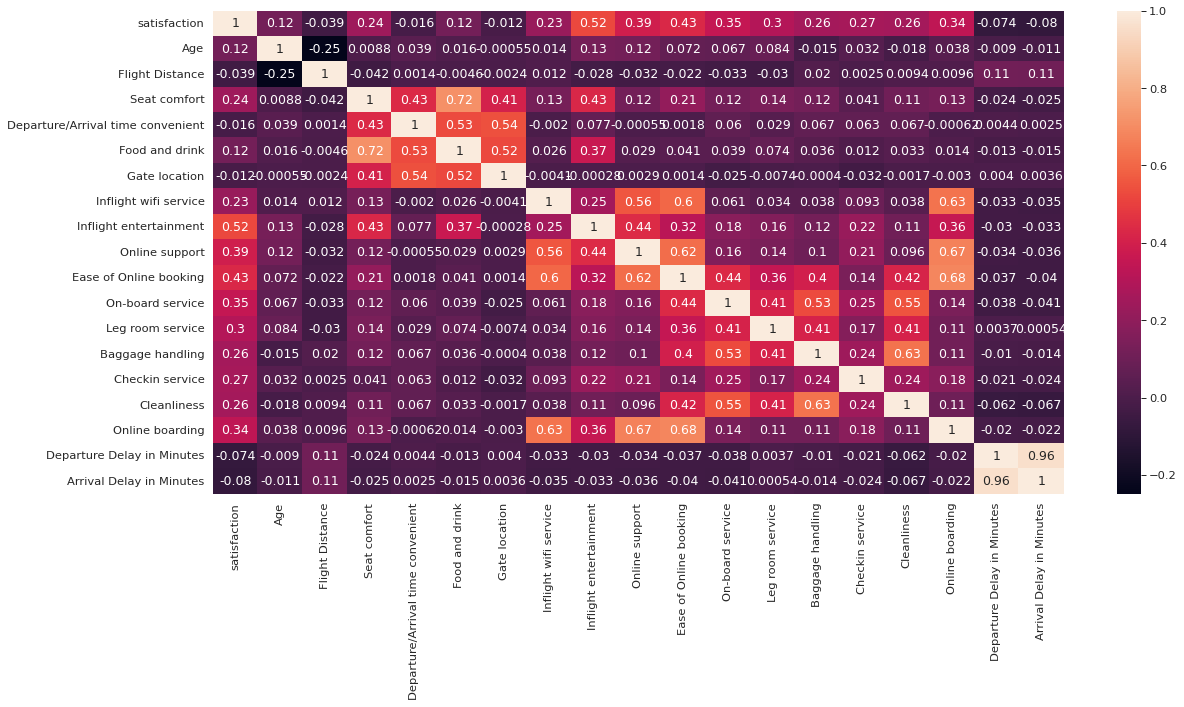

In [58]:
fig = plt.figure(figsize=(18,10))
sns.heatmap(data.corr(),annot=True)
plt.tight_layout()

In [73]:
y = data['satisfaction']
x = data.drop(columns=['satisfaction','Flight Distance','Departure/Arrival time convenient',
                    'Gate location', 'Departure Delay in Minutes','Arrival Delay in Minutes'], axis=1)

In [74]:
x

,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,Female,Loyal Customer,65,Personal Travel,Eco,0,0,2,4,2,3,3,0,3,5,3,2
1,Male,Loyal Customer,47,Personal Travel,Business,0,0,0,2,2,3,4,4,4,2,3,2
2,Female,Loyal Customer,15,Personal Travel,Eco,0,0,2,0,2,2,3,3,4,4,4,2
3,Female,Loyal Customer,60,Personal Travel,Eco,0,0,3,4,3,1,1,0,1,4,1,3
4,Female,Loyal Customer,70,Personal Travel,Eco,0,0,4,3,4,2,2,0,2,4,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,disloyal Customer,29,Personal Travel,Eco,5,5,2,5,2,2,3,3,4,4,4,2
129876,Male,disloyal Customer,63,Personal Travel,Business,2,2,2,1,1,3,2,3,3,1,2,1
129877,Male,disloyal Customer,69,Personal Travel,Eco,3,3,3,2,2,4,4,3,4,2,3,2
129878,Male,disloyal Customer,66,Personal Travel,Eco,3,3,3,2,2,3,3,2,3,2,1,2


In [75]:
y

0         1
1         1
2         1
3         1
4         1
         ..
129875    1
129876    0
129877    0
129878    0
129879    0
Name: satisfaction, Length: 129880, dtype: int64

In [76]:
data['Class'].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

In [77]:
x['Class'] = x.Class.map({
    'Eco': 0,
    'Eco Plus' : 1,
    'Business' : 2})

In [78]:
x = pd.get_dummies(x, columns=['Gender', 'Customer Type','Type of Travel'],drop_first=True)

In [79]:
#StandardScaler for column Age
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_transformer = scaler.fit(x[['Age']])
x_scaled = scaler_transformer.transform(x[['Age']])
x_scaled = pd.DataFrame(x_scaled,columns=['Age'])
x.drop(['Age'],axis=1,inplace=True)
x = pd.concat([x,x_scaled],axis=1)
x.reset_index().drop('index',axis=1,inplace=True)

In [80]:
x.head()

,Class,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Age
0,0,0,0,2,4,2,3,3,0,3,5,3,2,0,0,1,1.691351
1,2,0,0,0,2,2,3,4,4,4,2,3,2,1,0,1,0.500820
2,0,0,0,2,0,2,2,3,3,4,4,4,2,0,0,1,-1.615680
3,0,0,0,3,4,3,1,1,0,1,4,1,3,0,0,1,1.360648
4,0,0,0,4,3,4,2,2,0,2,4,2,5,0,0,1,2.022054


In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.33,
                                                    random_state=0,
                                                    stratify=y)

In [82]:

# from sklearn.neighbors import KNeighborsClassifier

# training_accuracy = []
# test_accuracy = []
# # try n_neighbors from 1 to 10
# neighbors_settings = range(1, 11)

# for n_neighbors in neighbors_settings:
#     # build the model
#     knn = KNeighborsClassifier(n_neighbors=n_neighbors)
#     knn.fit(X_train, y_train)
#     # record training set accuracy
#     training_accuracy.append(knn.score(X_train, y_train))
#     # record test set accuracy
#     test_accuracy.append(knn.score(X_test, y_test))

# plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
# plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("n_neighbors")
# plt.legend()
# plt.savefig('knn_compare_model')

KeyboardInterrupt: ignored

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report

In [84]:
def class_report(x,y,model):
    #X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=101)
    clf = model(random_state=101)
    clf.fit(X_train,y_train)
    
    prediction_test = clf.predict(X_test)
    prediction_train = clf.predict(X_train)
    
    print('Classification Data Test')
    print(classification_report(y_test,prediction_test))
    print('========================================================')
    print('Classification Data Train')
    print(classification_report(y_train,prediction_train))

In [85]:
class_report(x,y,LogisticRegression)

Classification Data Test
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     19402
           1       0.84      0.85      0.85     23459

    accuracy                           0.83     42861
   macro avg       0.83      0.83      0.83     42861
weighted avg       0.83      0.83      0.83     42861

Classification Data Train
              precision    recall  f1-score   support

           0       0.82      0.81      0.81     39391
           1       0.85      0.85      0.85     47628

    accuracy                           0.83     87019
   macro avg       0.83      0.83      0.83     87019
weighted avg       0.83      0.83      0.83     87019



In [86]:
class_report(x,y,DecisionTreeClassifier)

Classification Data Test
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     19402
           1       0.94      0.94      0.94     23459

    accuracy                           0.93     42861
   macro avg       0.93      0.93      0.93     42861
weighted avg       0.93      0.93      0.93     42861

Classification Data Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39391
           1       1.00      1.00      1.00     47628

    accuracy                           1.00     87019
   macro avg       1.00      1.00      1.00     87019
weighted avg       1.00      1.00      1.00     87019



In [87]:
class_report(x,y,RandomForestClassifier)

Classification Data Test
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     19402
           1       0.96      0.95      0.96     23459

    accuracy                           0.95     42861
   macro avg       0.95      0.95      0.95     42861
weighted avg       0.95      0.95      0.95     42861

Classification Data Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39391
           1       1.00      1.00      1.00     47628

    accuracy                           1.00     87019
   macro avg       1.00      1.00      1.00     87019
weighted avg       1.00      1.00      1.00     87019



In [88]:
class_report(x,y,GradientBoostingClassifier)

Classification Data Test
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     19402
           1       0.93      0.93      0.93     23459

    accuracy                           0.92     42861
   macro avg       0.92      0.92      0.92     42861
weighted avg       0.92      0.92      0.92     42861

Classification Data Train
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     39391
           1       0.93      0.93      0.93     47628

    accuracy                           0.92     87019
   macro avg       0.92      0.92      0.92     87019
weighted avg       0.92      0.92      0.92     87019



In [89]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(LogisticRegression(random_state=101),x,y,cv=3)
cv_score.mean()

0.46915622925623374

In [90]:
cv_score = cross_val_score(RandomForestClassifier(random_state=101),x,y,cv=3)
cv_score.mean()

0.5055745928405634

In [91]:
cv_score = cross_val_score(DecisionTreeClassifier(random_state=101),x,y,cv=3)
cv_score.mean()

0.493632996041129

In [92]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, KFold,cross_val_score
from sklearn import metrics

parameter = {'max_depth' : [10,15,20,25,30,35], 
             'min_samples_split' : [0.001,0.0001,0.00001,0.000001], 
             'min_samples_leaf' : [0.001,0.0001,0.00001,0.000001]}
x_train,x_test, y_train,y_test = train_test_split(x,y,random_state=101)
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=101),parameter, cv=3)
grid_search_cv.fit(x_train,y_train)
grid_search_cv.best_params_

{'max_depth': 35, 'min_samples_leaf': 1e-05, 'min_samples_split': 1e-05}

In [93]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=101)
model_1 = RandomForestClassifier(n_estimators=100)
model_1.fit(X_train,y_train)
prediction_test = model_1.predict(X_test)
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14899
           1       0.97      0.95      0.96     17571

    accuracy                           0.96     32470
   macro avg       0.95      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [94]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=101)
model_1 = RandomForestClassifier(n_estimators=250,max_depth=25, min_samples_leaf=0.000001, min_samples_split=0.000001)
model_1.fit(X_train,y_train)
prediction_test = model_1.predict(X_test)
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14899
           1       0.97      0.95      0.96     17571

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470

